# BIOEN 599 HW1 Problem Statement & System Definition
## Sheri Oktay

**Comments:**
1. A nit. To use the markup formatting, you need a space between "#" and the text. See below.
1. You had some missing variables and so several cells did not execute. Pleasecheck your notebook before you turn it in by doing "Kernel>Restart Kernel and run all cells".
1. I didn't see a definition of LEC (lymphatic endothelia cell) or an explanation for your focus on LECs in the control problem.

##Installs & Imports

In [1]:
# Install Packages
#!pip -q install controlSBML
#!pip -q install tellurium
#!pip -q install numpy
#!pip -q install matplotlib

In [2]:
# Import Packages
from controlSBML import ControlSBML as csbml
import control
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Problem Statement & Control Objectives

##Problem description:
Multiple investigations propose that a potential reason for hindered wound healing is the lack or inadequate development of lymphatic capillaries, a process known as lymphangiogenesis. [This model](https://www.ebi.ac.uk/biomodels/BIOMD0000000722#Overview) introduces a set of 5 ODEs that model the development of lymphatic capillaries in response to a skin wound. 5 time-dependent variables  considered:
1. 2 chemical concentrations (TGF-β and VEGF): T & V in the units of pg/mm3. Teq=T0=30 pg/mm3, Veq=V0=0.5 pg/mm3.
2. 3 cell densities (macrophages, LECs and lymphatic capillaries): M, L and C cell densities in the units of cells/mm3. Meq=M0=1875 cells/mm3, L+C threshold=constant post-wounding, L0=C0=0 and final C=1.4*10^4 cells/mm3 for proper wound healing.

Lymphangiogenesis, typically takes place between the 25th and 60th days post-wounding. The primary focus of the current model is on inflammation and the initial proliferation phase of the wound healing process. In individuals without health complications, the inflammatory phase initiates within a few hours of injury and persists for about 1 to 2 weeks. However, this phase is extended in individuals with diabetes since inflammatory macrophage density is increased and active TGF-β and VEGF concentrations are decreased.

Among potential treatments to enhance lymphangiogenesis in wound healing, macrophage-based treatments and TGF-β based treatments are the most sensitive ones to reach to a healthy level capillary cells post-wounding in diabetes. Among the “sensitive” parameters only aM, d2 and c1 vary between the normal and diabetic cases so they are natural target for therapy. Possible treatments are proposed in [the model paper](https://www.sciencedirect.com/science/article/pii/S0022519315003689?via=ihub):
1. Decreasing aM: Macrophage-mediated activation of TGF-β which is an inhibiting factor for LEC growth.
2. Increasing d2: Macrophage apoptosis rate.
3. Increasing c1: LEC growth rate.




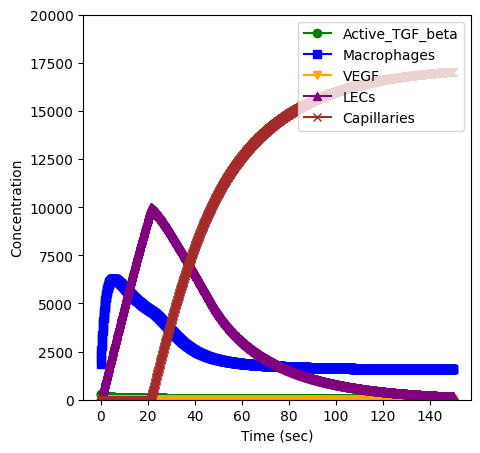

In [3]:
#Model obtained from Biomodels
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1811210001/4/Wound%20Healing%20with%20Normal%20health%20condition.xml"
ctlsb1 = csbml(URL)
ts1 = ctlsb1.plotModel(ylim=[0, 20000], times=np.linspace(0, 150, 1500))

In [4]:
#Identify input variables and parameters
ctlsb2 = csbml(MODEL)
print(ctlsb2.getPossibleInputs())

NameError: name 'MODEL' is not defined

## Control Objectives
The lymphangiogenesis process and the cell densities are time dependent as can be seen from the model graph above. Based on the knowledge obtained from the paper, even though the whole process takes up to 100 days, the initial inflammatory phase (20-25days) determines the total course of healing in diabetic patients. When the number of lymphatic endothelial cells (LECs) reaches to a value, they start to differentiate into lymphatic capillaries.
1. Reach to a healthy level of LECs post-wounding in diabetic patients, for the first 20-25 days of treatment in order to have a proper and timely lymphangiogenesis.

2. Avoid oscillations; fast settling times (convergence to steady state).


**Comments:** You need a numeric target for LECs.

## System Exploration
LEC growth is upregulated by VEGF and downregulated by TGF_beta. Both VEGF and TGF_beta concentrations are controlled by enzymes and macrophages. LECs use VEGF to divide and form Capillaries. Macrophages are selected as the input initially and plotted for the output LECs.

In [5]:
#Plotting the relationships between Macrophages and LECs
INPUT_NAME = 'Macrophages'
OUTPUT_NAME = 'LECs'

plt.scatter(ts[INPUT_NAME], ts[OUTPUT_NAME])
plt.xlabel(INPUT_NAME)
plt.ylabel(OUTPUT_NAME)
plt.show()

plt.scatter(ts.index, ts[INPUT_NAME])
plt.scatter(ts.index, ts[OUTPUT_NAME])
plt.xlabel(" time")
plt.legend([INPUT_NAME, OUTPUT_NAME])
plt.show()

NameError: name 'ts' is not defined

The input and output seems to be related but as expected, the relationship is time dependent.  

##Staircase response in healthy case

Based on the literature, equilibrium macrophages cell density is 1875 cells/mm3 initially for an healthy indiviual. Immediately after wounding, LECs are expected to increase immediately and reach to a healthy threshold value of 10^4 cell/mm3 around day 20 and then they self-organize into Capillaries around day 25.
The target number for LECs is 10^4 cells/mm3 in 20 days.
The macrophages density is set to 1875 initially in the model so for more physiological operating region, 1000-7000 is used initially.

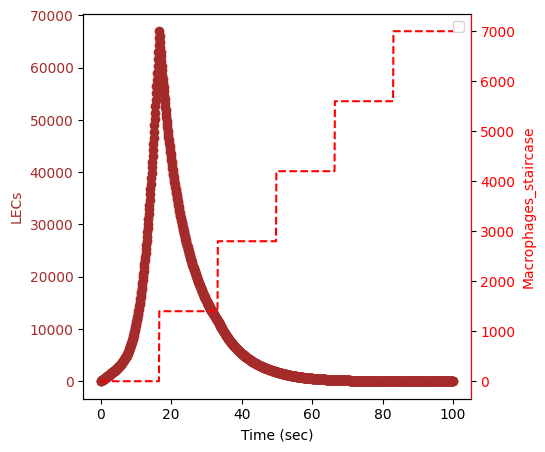

In [6]:
ctlsbs1 = csbml(URL, times=np.linspace(0, 100, 1000), input_names=["Macrophages"], output_names=["LECs"], is_fixed_input_species=True)
ts2= ctlsbs1.plotStaircaseResponse(initial_value=0, final_value=7000)

LECs increase to 70000 which is beyond the threshold value of 10^4. The time envelope and the operating region are narrowed down to see what happens.

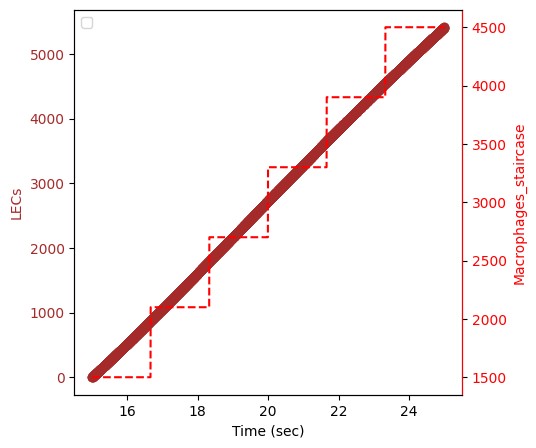

In [7]:
ctlsbs1 = csbml(URL, times=np.linspace(15, 25, 2000), input_names=["Macrophages"], output_names=["LECs"], is_fixed_input_species=True)
ts2= ctlsbs1.plotStaircaseResponse(initial_value=1500, final_value=4500)

Now, LECs are so low at the end of 20days so the input should be increased earlier.

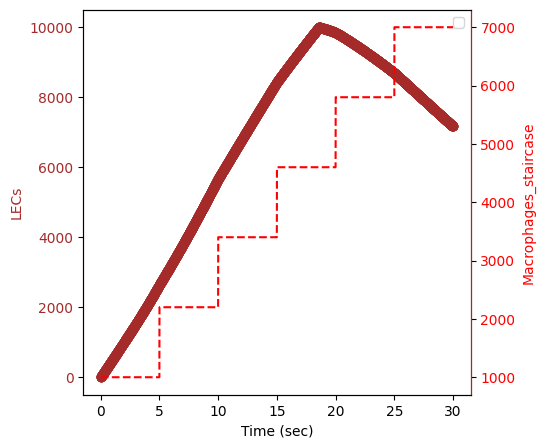

In [8]:
ctlsbs1 = csbml(URL, times=np.linspace(0, 30, 3000), input_names=["Macrophages"], output_names=["LECs"], is_fixed_input_species=True)
ts2= ctlsbs1.plotStaircaseResponse(initial_value=1000, final_value=7000)

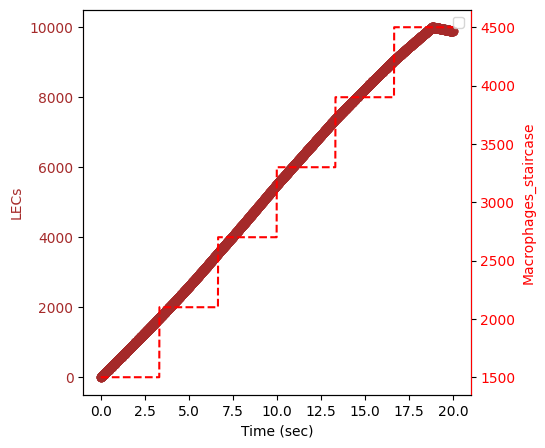

In [9]:
ctlsbs1 = csbml(URL, times=np.linspace(0, 20, 2000), input_names=["Macrophages"], output_names=["LECs"], is_fixed_input_species=True)
ts2= ctlsbs1.plotStaircaseResponse(initial_value=1500, final_value=4500)

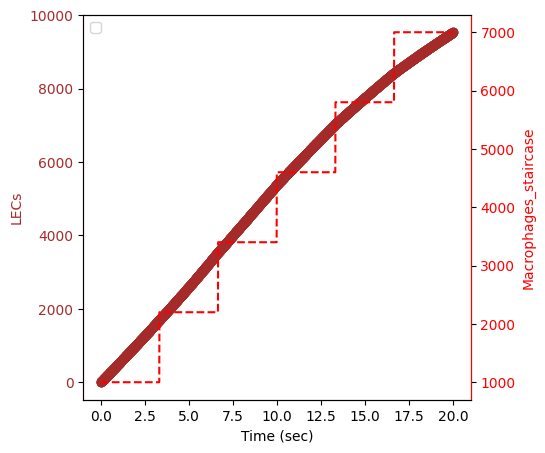

In [10]:
ctlsbs1 = csbml(URL, times=np.linspace(0, 20, 2000), input_names=["Macrophages"], output_names=["LECs"], is_fixed_input_species=True)
ts2= ctlsbs1.plotStaircaseResponse(initial_value=1000, final_value=7000)

It seems like it is not easy to control LECs just by varying Macrophages density only since time dependency is very dominant. The model used so far is actually for healthy condition, its initial conditions plays a role as well.

**Comments:** I don't think you're actually controlling LECs. You just have an initial transient.

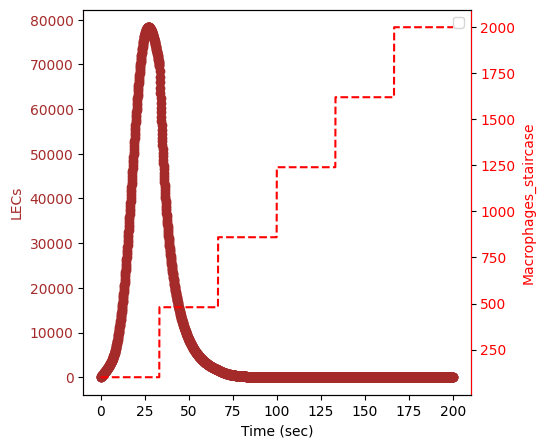

In [18]:
ctlsbs1 = csbml(URL, times=np.linspace(0, 200, 2000), input_names=["Macrophages"], 
                output_names=["LECs"], is_fixed_input_species=True)
_ = ctlsbs1.plotStaircaseResponse(initial_value=100, final_value=2000)

## Staircase response in diabetes case

The model for the wound Healing with diabetic health condition needs COPASI.

In [11]:
#!pip -q install python-copasi

In [12]:
#import COPASI as cops

In [13]:
#URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1811210001/4/Wound%20Healing%20with%20Diabetic%20health%20condition.cps"
#ctlsb1 = cops(URL)
#ts1 = ctlsb1.plotModel(ylim=[0, 20000], times=np.linspace(0, 150, 1500))

## System definition

The system is defined by the following:

1. SBML model: BIOMD0000000722
2. Output: Capillaries
3. Input: Macrophages
4. Directional effect of the input on the output: increases
5. Operating region for the input: [1000, 7000]
6. Range of outputs that can be achieved: [0, 1.2*10^4]

In [14]:
#As reference
antimony_model = ctlsb1.getAntimony()
print(antimony_model)

// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function Function_for_reaction_1(a_p, p_0, T_L, t, a_M, M, r1)
  (a_p*p_0*exp(-a_p*T_L*t) + a_M*M)*(T_L + r1*M);
end

Function_for_reaction_1 is "Function for reaction 1"

function Function_for_reaction_4(alpha, b1, T, b2)
  alpha*(b1*T^2/(b2 + T^4));
end

Function_for_reaction_4 is "Function for reaction 4"

function Function_for_reaction_5(beta, r2, M, k1)
  beta*r2*M*(1 - M/k1);
end

Function_for_reaction_5 is "Function for reaction 5"

function Function_for_reaction_7(rho, C, M)
  rho*C*M;
end

Function_for_reaction_7 is "Function for reaction 7"

function Function_for_reaction_9(r3, M)
  r3*M;
end

Function_for_reaction_9 is "Function for reaction 9"

function Function_for_reaction_11(gamma_, V, L)
  gamma_*V*L;
end

Function_for_reaction_11 is "Function for reaction 11"

function Function_for_reaction_12(c1, V, c2, c3, c4, T, L)
  (c1 